0


<IPython.core.display.Javascript object>


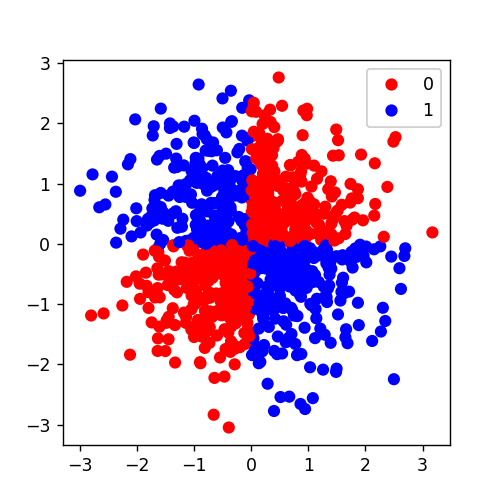

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3,3,50), np.linspace(-3,3,50))
rng = np.random.RandomState(0)
X = rng.randn(1000, 2)
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0).astype(int)
print(Y[0])
colors = ['red', 'blue']

fig, ax = plt.subplots(figsize=(4,4))
scatter = ax.scatter(X[:,0], X[:,1], c=Y, cmap=matplotlib.colors.ListedColormap(colors))
legend = ax.legend(*scatter.legend_elements())
ax.add_artist(legend)
plt.show()

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

batch_size=8

training_data = DataLoader(TensorDataset(torch.Tensor(X[:750,:]), torch.tensor(Y[:750], dtype=torch.long)), shuffle=True, batch_size=batch_size)
validation_data = DataLoader(TensorDataset(torch.Tensor(X[750:,:]), torch.tensor(Y[750:], dtype=torch.long)), batch_size=batch_size)

In [3]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.activation = nn.ReLU()
        self.first_hidden = nn.Linear(2, 10)
        self.second_hidden = nn.Linear(10, 5)
        self.output = nn.Linear(5, 2)

    def forward(self, x):
        x = self.activation(self.first_hidden(x))
        x = self.activation(self.second_hidden(x))
        x = self.output(x)
        return x

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (activation): ReLU()
  (first_hidden): Linear(in_features=2, out_features=10, bias=True)
  (second_hidden): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=2, bias=True)
)


In [4]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [5]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [6]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [8]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(training_data, model, loss_fn, optimizer)
    test(validation_data, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.757221  [    0/  750]
Test Error: 
 Accuracy: 50.4%, Avg loss: 0.703969 

Epoch 2
-------------------------------
loss: 0.727163  [    0/  750]
Test Error: 
 Accuracy: 50.4%, Avg loss: 0.701727 

Epoch 3
-------------------------------
loss: 0.723500  [    0/  750]
Test Error: 
 Accuracy: 50.4%, Avg loss: 0.699858 

Epoch 4
-------------------------------
loss: 0.708814  [    0/  750]
Test Error: 
 Accuracy: 50.4%, Avg loss: 0.698266 

Epoch 5
-------------------------------
loss: 0.752507  [    0/  750]
Test Error: 
 Accuracy: 50.4%, Avg loss: 0.696910 

Epoch 6
-------------------------------
loss: 0.644252  [    0/  750]
Test Error: 
 Accuracy: 50.4%, Avg loss: 0.695721 

Epoch 7
-------------------------------
loss: 0.647082  [    0/  750]
Test Error: 
 Accuracy: 50.0%, Avg loss: 0.694693 

Epoch 8
-------------------------------
loss: 0.680468  [    0/  750]
Test Error: 
 Accuracy: 48.0%, Avg loss: 0.693794 

Epoch 9
----------------

Test Error: 
 Accuracy: 60.4%, Avg loss: 0.657004 

Epoch 69
-------------------------------
loss: 0.632851  [    0/  750]
Test Error: 
 Accuracy: 60.8%, Avg loss: 0.656152 

Epoch 70
-------------------------------
loss: 0.615665  [    0/  750]
Test Error: 
 Accuracy: 61.2%, Avg loss: 0.655264 

Epoch 71
-------------------------------
loss: 0.646904  [    0/  750]
Test Error: 
 Accuracy: 62.0%, Avg loss: 0.654395 

Epoch 72
-------------------------------
loss: 0.668753  [    0/  750]
Test Error: 
 Accuracy: 63.2%, Avg loss: 0.653506 

Epoch 73
-------------------------------
loss: 0.693124  [    0/  750]
Test Error: 
 Accuracy: 64.4%, Avg loss: 0.652609 

Epoch 74
-------------------------------
loss: 0.626922  [    0/  750]
Test Error: 
 Accuracy: 65.6%, Avg loss: 0.651677 

Epoch 75
-------------------------------
loss: 0.658642  [    0/  750]
Test Error: 
 Accuracy: 65.6%, Avg loss: 0.650755 

Epoch 76
-------------------------------
loss: 0.657453  [    0/  750]
Test Error: 
 Ac